In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler

import joblib
from sklearn.pipeline import Pipeline

In [34]:
## loading the csv file
df=pd.read_csv("irrigation_machine.csv")
df

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0


In [35]:
## for displaying first 5 rows
df.head()

#sensors->represent the sensor put in the ground
#parcels->the respective irrigation pumps

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [36]:
df.info()    ## gives the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [37]:
df.columns   ## to get the names of columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [38]:
df=df.drop('Unnamed: 0',axis=1) ## we drop the first column as it is index itself .. soo no need 
# axis=1 represents column and axis=0 represent rows
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [39]:
df.describe().T ## statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
sensor_0,2000.0,1.4370,1.321327,0.0,0.0,1.0,2.0,8.0
sensor_1,2000.0,1.6590,1.338512,0.0,1.0,1.0,2.0,9.0
sensor_2,2000.0,2.6545,1.699286,0.0,1.0,2.0,4.0,10.0
sensor_3,2000.0,2.6745,1.855875,0.0,1.0,2.0,4.0,11.0
sensor_4,2000.0,2.8875,1.816451,0.0,2.0,3.0,4.0,12.0
sensor_5,2000.0,1.4110,1.339394,0.0,0.0,1.0,2.0,7.0
sensor_6,2000.0,3.3155,2.206444,0.0,2.0,3.0,5.0,13.0
sensor_7,2000.0,4.2015,2.280241,0.0,3.0,4.0,6.0,12.0
sensor_8,2000.0,1.2140,1.386782,0.0,0.0,1.0,2.0,8.0
sensor_9,2000.0,1.9010,1.518668,0.0,1.0,2.0,3.0,9.0


In [40]:
# STEP 2: DEFINE FEATURES AND LABELS/FEATURE AND TARGET SELECTION
# ILOC -- BASED ON INDEX
# LOC -- WORK ON CERTAIN STRINGS LIKE 'COL','COL1'
# df.iloc[r,c]== [startrow:endrow-1, startcol:endcol-1]

#  X=FEATURES=INDEPENDENT VAR
X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)

#  y=LABELS=DEPENDENT VAR
y = df.iloc[:, 20:]

In [41]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1039,1.0,0.0,3.0,2.0,6.0,3.0,6.0,4.0,1.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0
60,0.0,2.0,4.0,5.0,1.0,3.0,2.0,5.0,2.0,2.0,4.0,4.0,1.0,2.0,0.0,2.0,0.0,5.0,2.0,2.0
48,0.0,0.0,0.0,0.0,5.0,1.0,5.0,4.0,0.0,0.0,1.0,2.0,6.0,1.0,3.0,4.0,4.0,2.0,1.0,0.0
765,0.0,2.0,3.0,3.0,2.0,1.0,2.0,7.0,0.0,1.0,3.0,7.0,4.0,3.0,2.0,1.0,1.0,1.0,2.0,0.0
275,0.0,2.0,1.0,5.0,4.0,1.0,4.0,4.0,0.0,2.0,1.0,7.0,6.0,5.0,3.0,2.0,0.0,1.0,1.0,3.0
1083,2.0,2.0,5.0,1.0,2.0,1.0,4.0,4.0,1.0,4.0,1.0,6.0,3.0,3.0,3.0,2.0,3.0,3.0,0.0,3.0
387,2.0,2.0,1.0,2.0,7.0,3.0,7.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,2.0,0.0
1130,2.0,4.0,2.0,4.0,1.0,4.0,5.0,3.0,5.0,4.0,1.0,3.0,2.0,2.0,4.0,3.0,5.0,3.0,1.0,5.0
441,1.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,0.0,1.0,3.0,9.0,8.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0
1846,2.0,0.0,7.0,1.0,3.0,0.0,5.0,4.0,0.0,0.0,2.0,4.0,7.0,3.0,1.0,2.0,4.0,2.0,0.0,0.0


In [42]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
762,1,1,0
1551,1,1,0
1819,1,1,0
926,0,0,0
826,1,1,1
299,1,0,0
286,1,1,0
283,1,0,0
1911,1,1,0
640,1,1,0


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [44]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [45]:
X.shape , y.shape

((2000, 20), (2000, 3))

In [46]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)
x_scaled   ## input i gave a dataframe .. but after applying minmax scalar .. i got an numpy array


array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]], shape=(2000, 20))

In [47]:
## test train and split -- step 3
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [49]:

xgb_model = MultiOutputClassifier(XGBClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=5,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    use_label_encoder=False, eval_metric='logloss'
))

In [50]:
xgb_model.fit(X_train, y_train)

c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,n_jobs,None
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None


In [51]:
xgb_pred = xgb_model.predict(X_test)

In [52]:
print("XGBoost Report")
print(classification_report(y_test, xgb_pred, target_names=y.columns))

XGBoost Report
              precision    recall  f1-score   support

    parcel_0       0.90      0.93      0.91       256
    parcel_1       0.93      0.94      0.93       304
    parcel_2       0.81      0.66      0.73        87

   micro avg       0.90      0.89      0.90       647
   macro avg       0.88      0.84      0.86       647
weighted avg       0.90      0.89      0.90       647
 samples avg       0.81      0.79      0.79       647



c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [53]:
## training -- step4
rf=RandomForestClassifier(n_estimators=200,
                          max_depth=10,
                          min_samples_split=4,
                          min_samples_leaf=2,
                          max_features='sqrt',
                          random_state=42)

model=MultiOutputClassifier(rf)
model.fit(X_train,y_train)


,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [54]:
## evaluate the model

print("Random Forest Report")
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=y.columns))

Random Forest Report
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\OneDrive\Desktop\work\ml\aicte\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [55]:
## after seeing the above reports we can say that the recall for parcel_2 is less .. and overall f1-score is also less
## what we can do is .. check if our dataset is imbalanced 

print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


In [56]:
# we see that our dataset is imbalanced ... we can add class_weight='balanced', to our random forest classifier 

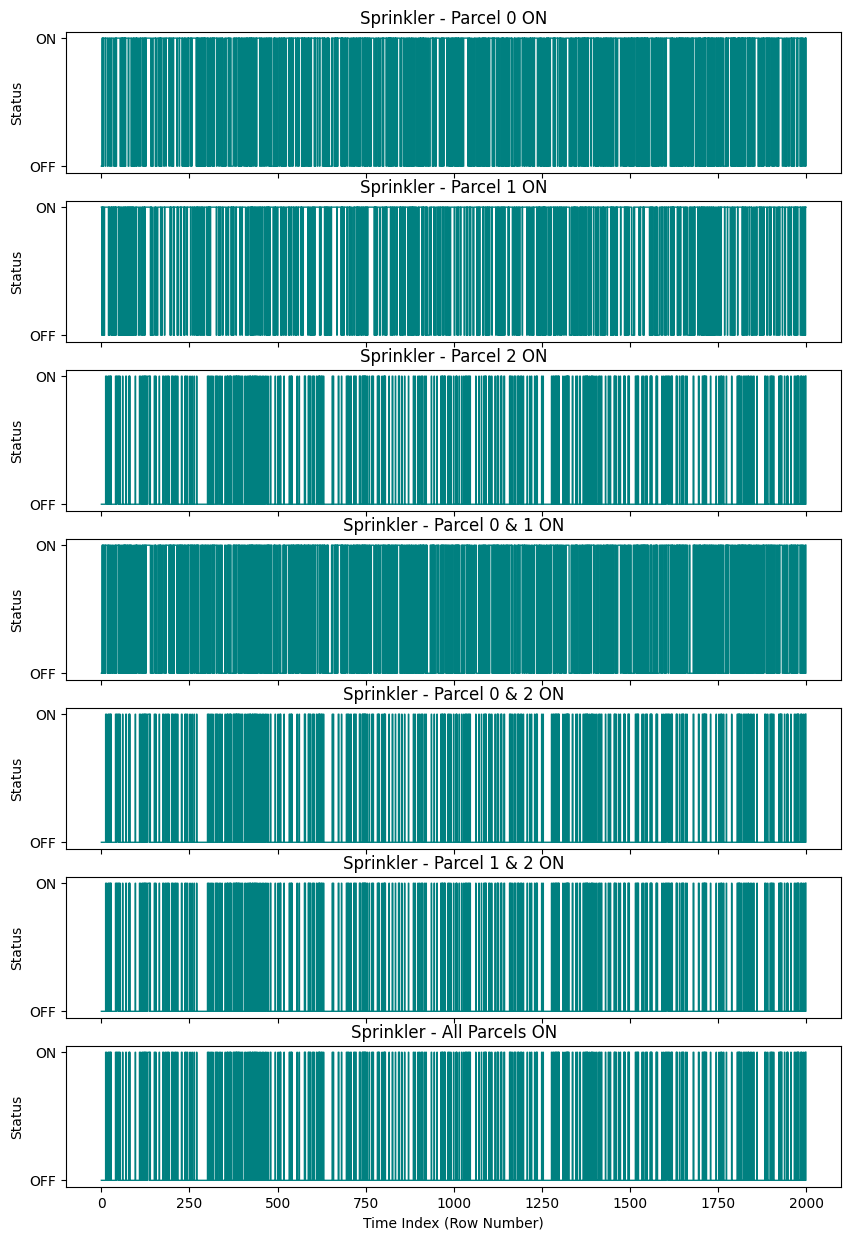

In [57]:

# Define parcel activation conditions with descriptive labels
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

# Create vertically stacked subplots (one for each condition)
fig, axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)

# Loop through each condition to plot corresponding square wave
for ax, (title, condition) in zip(axs, conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='teal')
    ax.set_title(f"Sprinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])
   

# Label x-axis on the last subplot
axs[-1].set_xlabel("Time Index (Row Number)")

# Plot
plt.show()

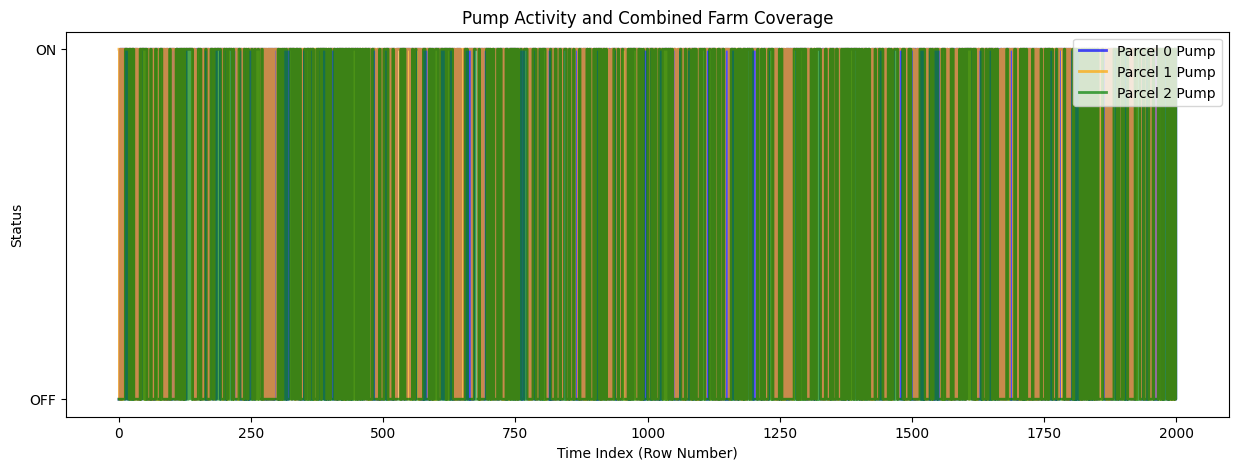

In [58]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = (df['parcel_0'] == 1) | (df['parcel_1'] == 1) | (df['parcel_2'] == 1)

plt.figure(figsize=(15, 5))

# Plot individual pump 
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue',alpha=0.7)
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange',alpha=0.7)
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green',alpha=0.7)

plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.legend(loc='upper right')
plt.show()

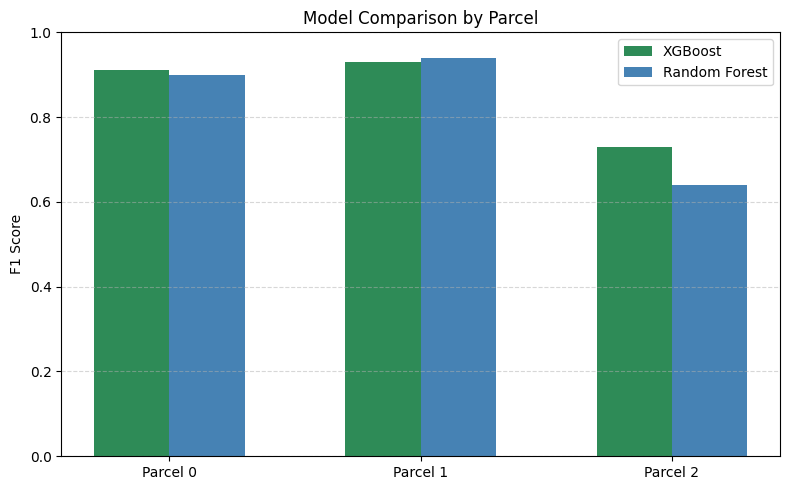

In [59]:


labels = ['Parcel 0', 'Parcel 1', 'Parcel 2']
xgb_f1 = [0.91, 0.93, 0.73]
rf_f1  = [0.90, 0.94, 0.64]

x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, xgb_f1, width=0.3, label='XGBoost', align='center', color='seagreen')
plt.bar([i + 0.3 for i in x], rf_f1, width=0.3, label='Random Forest', align='center', color='steelblue')

plt.xticks([i + 0.15 for i in x], labels)
plt.ylabel("F1 Score")
plt.title("Model Comparison by Parcel")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


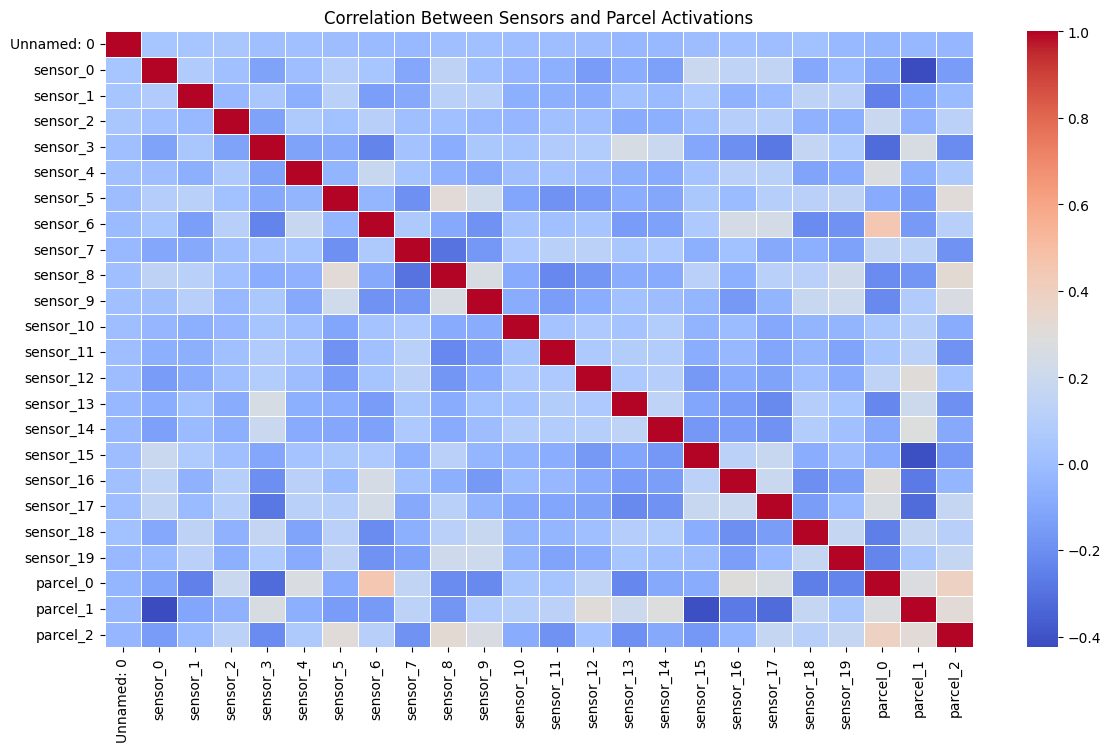

In [60]:


# Re-load the original (unscaled) dataset if needed
df = pd.read_csv("irrigation_machine.csv")

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Between Sensors and Parcel Activations")
plt.show()


In [61]:
import joblib
from sklearn.pipeline import Pipeline

joblib.dump(model, "Farm_Irrigation_System.pkl")

['Farm_Irrigation_System.pkl']